In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [36]:
import os
import zipfile

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
# your working directory 
BASE_PATH="/data/tmp"
# datasets in zip file 
training_zip="rps.zip"
test_zip="rps-test-set.zip"

training_set="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip"
test_set="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip"

In [4]:
# Download training dataset
!wget $training_set -O "/data/tmp/rps.zip"
  
# Download test test    
!wget $test_set -O "/data/tmp/rps-test-set.zip"

--2019-11-18 19:31:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128, 2a00:1450:400b:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/data/tmp/rps.zip’

/data/tmp/rps.zip   100%[===================>] 191.38M  22.8MB/s    in 8.5s    

2019-11-18 19:31:52 (22.4 MB/s) - ‘/data/tmp/rps.zip’ saved [200682221/200682221]

--2019-11-18 19:31:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128, 2a00:1450:400b:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/data/tmp/rps-test-

In [5]:
!ls -ltr /data/tmp/*.zip

-rw-r--r-- 1 root root  68606236 Mar 28  2018 /data/tmp/cats_and_dogs_filtered.zip
-rwxr-xr-x 1 root root  29516758 Feb 11  2019 /data/tmp/rps-test-set.zip
-rwxr-xr-x 1 root root 200682221 Feb 11  2019 /data/tmp/rps.zip


In [6]:
def extract_dataset(filename):
    ''' will extract the dataset on the fullpath 
      to the BASE_PATH defined
      Args:
        fullpath (str): zip filename
    '''
    file_zip=os.path.join(BASE_PATH,filename)
    zip_ref = zipfile.ZipFile(file_zip, 'r')
    zip_ref.extractall(BASE_PATH)
    zip_ref.close()

In [7]:
# Extract datasets 
extract_dataset(training_zip)
extract_dataset(test_zip)

In [8]:
!ls $BASE_PATH/rps

paper  rock  scissors


In [9]:
# Define directories
rock_dir = os.path.join(BASE_PATH,"rps","rock")
paper_dir = os.path.join(BASE_PATH,"rps","paper")
scissors_dir = os.path.join(BASE_PATH,"rps","scissors")

In [10]:
def list_files(path, qty_files=10):
    files_list = os.listdir(path)
    return files_list[:qty_files]

In [11]:
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

# list files on each directory and store it on a list
rock_files = list_files(rock_dir)
paper_files = list_files(paper_dir)
scissor_files = list_files(scissors_dir)

files_dict = { rock_dir: rock_files,
               paper_dir: paper_files, 
               scissors_dir: scissor_files
             }

# print each list
for files in files_dict.values():
    print(files)

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-102.png', 'rock03-111.png', 'rock01-002.png', 'rock05ck01-097.png', 'rock06ck02-014.png', 'rock02-036.png', 'rock07-k03-072.png', 'rock05ck01-042.png', 'rock02-024.png', 'rock06ck02-008.png']
['paper05-070.png', 'paper03-088.png', 'paper03-112.png', 'paper04-067.png', 'paper01-086.png', 'paper05-013.png', 'paper05-100.png', 'paper06-095.png', 'paper01-105.png', 'paper03-101.png']
['testscissors01-055.png', 'scissors02-014.png', 'testscissors02-004.png', 'testscissors03-099.png', 'testscissors01-102.png', 'testscissors01-061.png', 'testscissors02-076.png', 'scissors02-074.png', 'testscissors03-072.png', 'scissors02-056.png']


In [12]:
# we need to import matplotlib :)
import matplotlib.pyplot as plt

def plotImages(array_of_images):
    # We define a plot of 1 rows and 3 columns of images
    fig, axes = plt.subplots(1, 4, figsize=(8,8))
    # iterate over each image and (row,col)
    for img, ax in zip( array_of_images, axes.flat):
        # show the image on the right axis
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
def get_batch(file_dir, files_list, idx=4):
    imgs = []
    for fname in files_list[0:idx]:
        img_path=os.path.join(file_dir, fname)
        img = mpimg.imread(img_path)
        imgs.append(img)
    return imgs

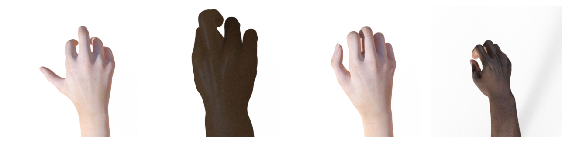

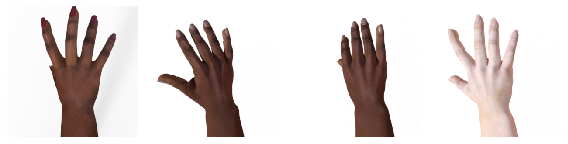

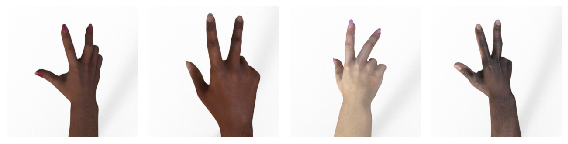

In [14]:
# Plot images for all the classes available
for dir, files in files_dict.items():
    plotImages(get_batch(dir, files))

In [15]:
# Define some constants :) 
TRAINING_DIR = os.path.join(BASE_PATH, "rps")
VALIDATION_DIR = os.path.join(BASE_PATH,"rps-test-set")

TARGET_SIZE=(150,150)
CLASS_MODE='categorical'

In [16]:
# Define the training image data generator
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [17]:
# Define the validation ImageDataGenerator
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
def create_generator(data_generator, directory, target_size, class_mode):
    return data_generator.flow_from_directory(
        directory=directory,
        target_size=target_size,
        class_mode=class_mode
    )

In [19]:
# Load the training data and create the training generator
train_generator = create_generator(training_datagen, TRAINING_DIR, TARGET_SIZE, CLASS_MODE)

Found 2520 images belonging to 3 classes.


In [20]:
# Load the validation data and create the training generator
validation_generator = create_generator(validation_datagen, VALIDATION_DIR, TARGET_SIZE, CLASS_MODE)

Found 372 images belonging to 3 classes.


In [21]:
# Define the model 
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:
# Let's check the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [23]:
# Configure the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
# Train the model 
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

Epoch 1/25
79/79 [==============================] - 22s 282ms/step - loss: 1.2416 - accuracy: 0.3853 - val_loss: 1.0186 - val_accuracy: 0.5000
Epoch 2/25
79/79 [==============================] - 17s 215ms/step - loss: 0.8810 - accuracy: 0.5845 - val_loss: 0.3798 - val_accuracy: 0.9435
Epoch 3/25
79/79 [==============================] - 17s 217ms/step - loss: 0.6146 - accuracy: 0.7417 - val_loss: 0.1479 - val_accuracy: 0.9328
Epoch 4/25
79/79 [==============================] - 17s 220ms/step - loss: 0.4133 - accuracy: 0.8345 - val_loss: 0.1068 - val_accuracy: 0.9731
Epoch 5/25
79/79 [==============================] - 18s 225ms/step - loss: 0.2757 - accuracy: 0.8929 - val_loss: 0.0834 - val_accuracy: 0.9946
Epoch 6/25
79/79 [==============================] - 18s 223ms/step - loss: 0.2214 - accuracy: 0.9187 - val_loss: 0.0502 - val_accuracy: 0.9704
Epoch 7/25
79/79 [==============================] - 18s 223ms/step - loss: 0.2161 - accuracy: 0.9198 - val_loss: 0.2313 - val_accuracy: 0.9086

In [28]:
# Save the model 
model.save("rps.h5")

In [32]:
# Check your history keys :) 
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


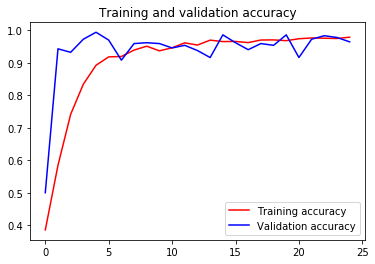

<Figure size 432x288 with 0 Axes>

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [48]:
# Uncomment the following 2 lines if using colab
# uploaded=files.upload()
# keys = uploaded.keys()

# if you are not using colab, this trick will do :)
base_path="./dataset/"
keys=!ls $base_path
print(keys)

['pap.png', 'pap_2.jpg', 'rock.jpeg', 'rock_2.png', 'rock_3.jpg', 'sci.png', 'sci_2.jpg']


In [49]:
for fn in keys:
 
  # predicting images
  path = os.path.join(base_path,fn)
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

pap.png
[[0. 1. 0.]]
pap_2.jpg
[[1. 0. 0.]]
rock.jpeg
[[0. 1. 0.]]
rock_2.png
[[0. 1. 0.]]
rock_3.jpg
[[0. 1. 0.]]
sci.png
[[0. 0. 1.]]
sci_2.jpg
[[0. 0. 1.]]
